                                      HOTEL BOOKING DEMAND DATASET ANALYSIS.

## INTRODUCTION: ABOUT THIS DATASET.
Have you ever wondered when the best time of the year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?This hotel booking dataset can help you explore those questions!

## CONTENT.
The dataset for this project contains booking information for a City hotel and a Resort hotel, and includes information as when the booking was made, number of adults,children and/or babies, length of stay, and the number of available parking spaces, among other things.

MY ANALYSIS WILL FOCUS ON PROVIDING ANSWERS TO THE FOLLOWING QUESTIONS:

1. How many bookings were cancelled?

2. What is the percentage of booking for each year?

3. Which is the busiest months for hotels?

4. From which country does most guest come from?

5. How long do guest stay in the hotel?

6. What is the booking ratio between Resort hotel and City hotel?

7. Which was the most booked accommodation type(single, couple, family)?

.  When we are done with providing answers to this questions, we will build a predictive model to make predictions in the future whether a booking will be cancelled or not.

In [1]:
# import libraries
#!pip install pycountry

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Import data
hotel = pd.read_csv('hotel_bookings.csv')

##  View of data

In [3]:
# Show the first five rows
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
hotel.shape

(119390, 32)

From above, we can observe that it returned (119390, 32), that means there are 119390 rows of data with 32 columns.

## DATA PROCESSING

## DESCRIPTIVE STATISTICAL ANALYSIS!
   
 The dataset variable itself is a dictionary, so we can check for its keys using the .keys() method.


 Keys() function is used to know all the column attribute names as illustrated below.

In [6]:
hotel.keys()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

The description of the dataset is available in the dataset itself. We can view it using "Describe()".

In [7]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


The above output describes the Statistical values for non categorical columns. It describes the mean, Standard deviation, min and max,etc values on each non-categorical columns.

Info() method on your DataFrame is use to get useful information about the data; like row count, null column or not and data-type.

In [8]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

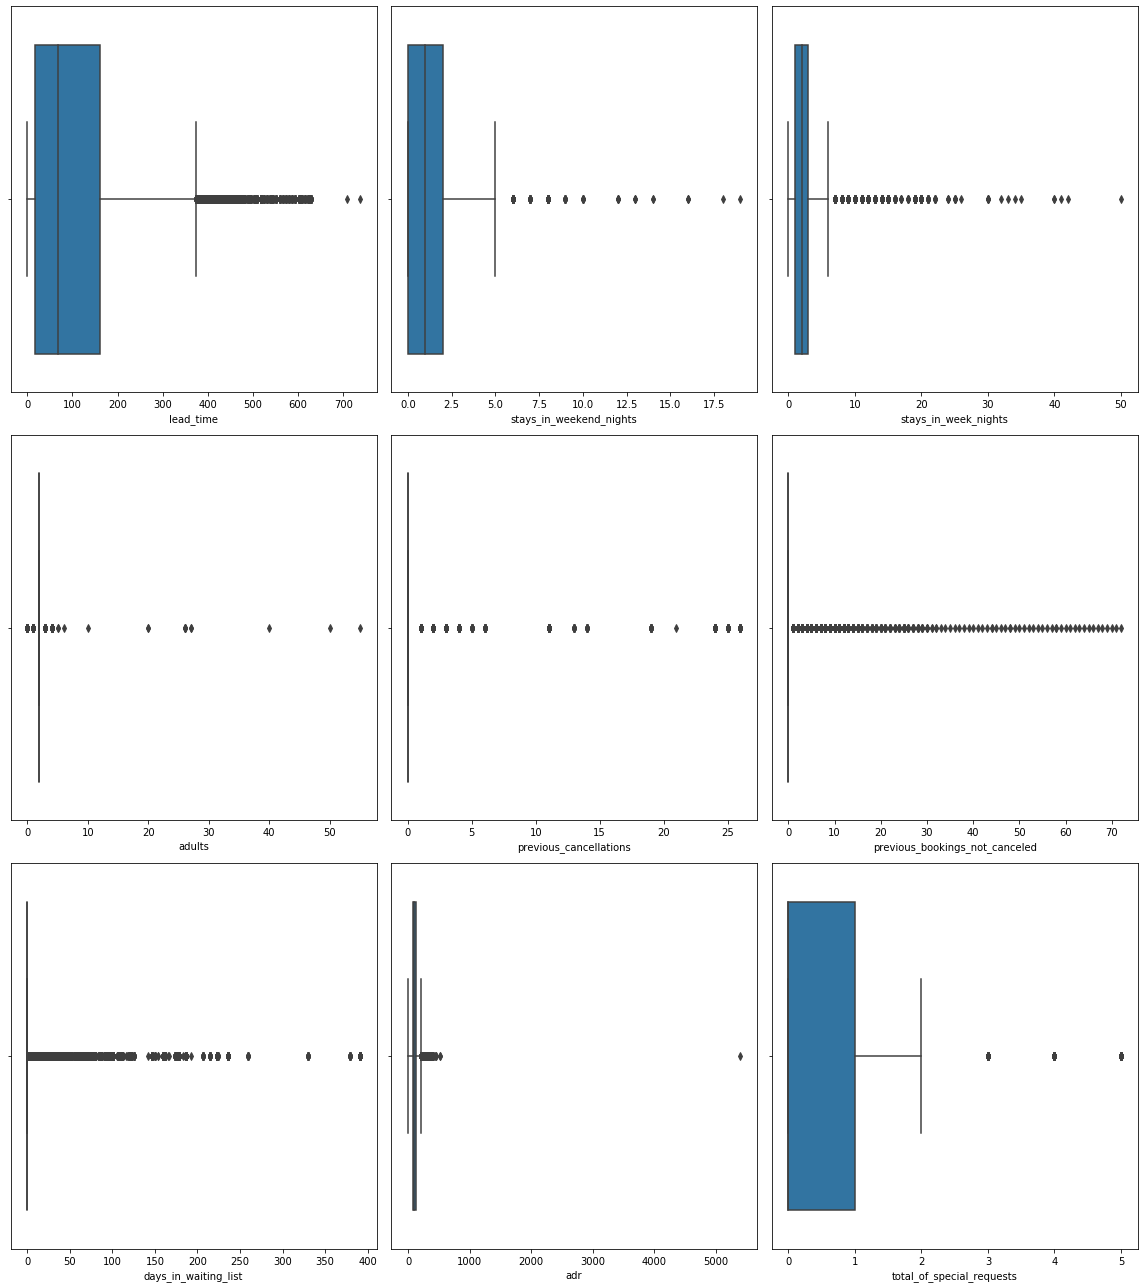

In [9]:
# Creating a boxplot for Outlier detection
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'previous_cancellations', 'previous_bookings_not_canceled',
            'days_in_waiting_list', 'adr', 'total_of_special_requests']
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(3,3,n)
    sns.boxplot(hotel[feature])
    n+=1
    plt.tight_layout()

                            The above illustrations show that there are many outliers.

In [10]:
# checking for null value
print("# of NaN in each columns:", hotel.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

In [11]:
# It is better to copy the original dataset, it might be needed in certain cases.
hotel = hotel.copy()

##  Exploratory Data Analysis(EDA).

Let's extract the information from our data and then try to answer our questions.

## Q1. How many bookings were cancelled?

Lets write a function to get the percentage of different values.

In [12]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

This function takes a series or data frame column and returns the two arrays.

X is our unique value

Y is the percentage value of each unique value

Now let's use these function on the 'ís_canceled' feature and see the result.

In [13]:
x,y = get_count(hotel['is_canceled'])

"is_canceled" have two unique values: 1 if booking got canceled, else 0.

Now let’s plot this result.

We will write another function like the one above to plot the diagram.

In [14]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax)
        
    
    plt.show()

This function takes two arrays, x and y, and displays the required diagram. The default plot type is a bar plot, but we can also plot the line plot. Optional arguments can be given to display title and labels.

Now, let’s call the function.

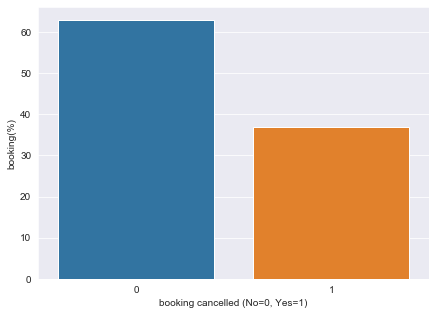

In [15]:
plot(x,y, x_label='booking cancelled (No=0, Yes=1)', y_label='booking(%)')

In [16]:
x,y

(array([0, 1], dtype=int64), array([62.95837172, 37.04162828]))

From above illustrated plot, bookings got canceled 37% of the time. While booking guest checked-in (did not cancel the booking ) almost 63% of the time

## Q2. What is the percentage of booking for each year?

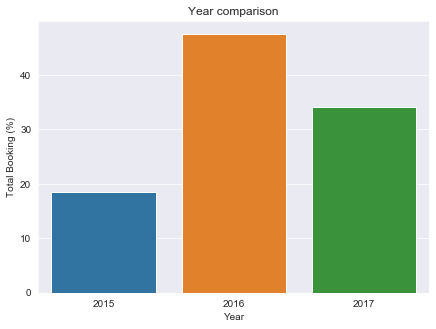

In [17]:
x,y = get_count(hotel['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

From the plot illustrated above, we can observe that more than double bookings were made in 2016, compared to the previous year of 2015. But the bookings decreased by almost 15% the next year 2017

Next, let’s try to separate it by each hotel and then plot the diagram. We will change our code to display the countplot

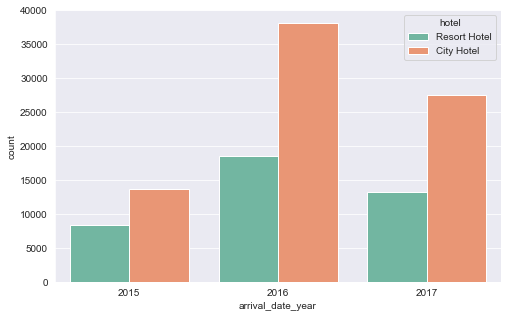

In [18]:
plt.subplots(figsize=(8,5))
sns.countplot(x='arrival_date_year', hue='hotel', data= hotel, palette = 'Set2');

              Year-wise and Hotel-wise (side-by-side) comparison

## Q3. Which is the most busy months for hotels?

To be able to answer this question, We will select the arrival_date_month feature and then get it's value count. Now the resulting data will not be sorted according to month order so we have to sort it. We will make the new list with the names of months in order to sort our data according to this list.

We will use the Lineplot to display the trend.

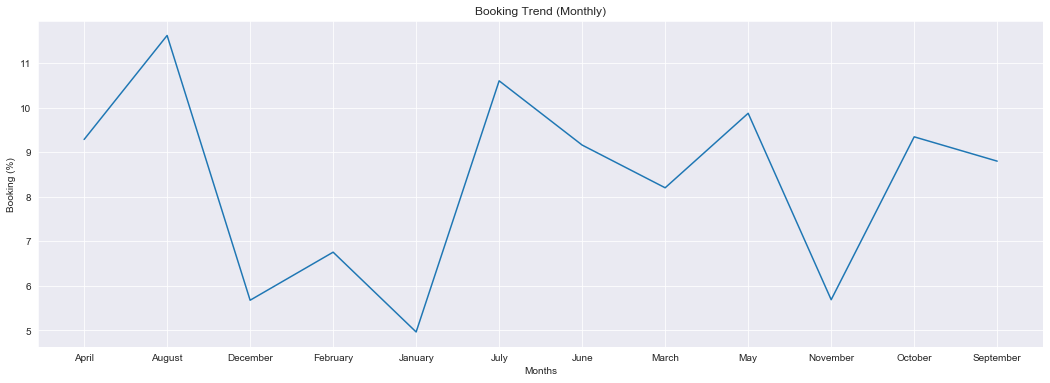

In [19]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sorted_months = hotel['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))

                           The above is a line plot to show monthly hotel booking trend

As can be seen above, most bookings were made from July to August. While the least bookings were made at the start and end of the year

Now, let's try to separate the data for each hotel type and then see what the trend would look like.

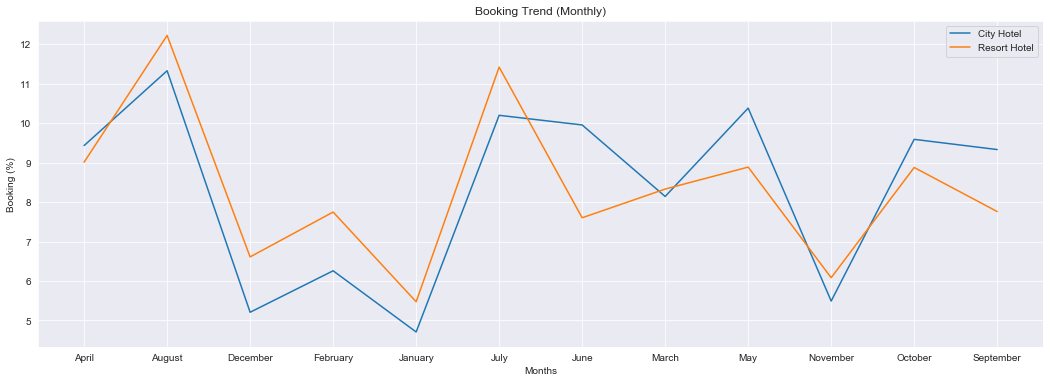

In [20]:
## Order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


## Select only City Hotel
sorted_months = hotel.loc[hotel.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100



## Select only Resort Hotel
sorted_months = hotel.loc[hotel.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100






## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


sns.lineplot(x1, y1.values, label='City Hotel')
sns.lineplot(x1, y2.values, label='Resort Hotel')

plt.show()

From the illustraton above, we can see that the trend is similar with a small noticeable difference. Resort hotel has more bookings at the start and end of the year, and lower bookings in June and September.

## Q4. From which country does most guest come from?

"Pycountry" is a very useful python package.We will use this package to get country names from country codes.

https://github.com/flyingcircusio/pycountry

https://pypi.org/project/pycountry/

In [21]:
import pycountry as pc

In [22]:
hotel_cat = hotel.columns[hotel.dtypes == 'object']

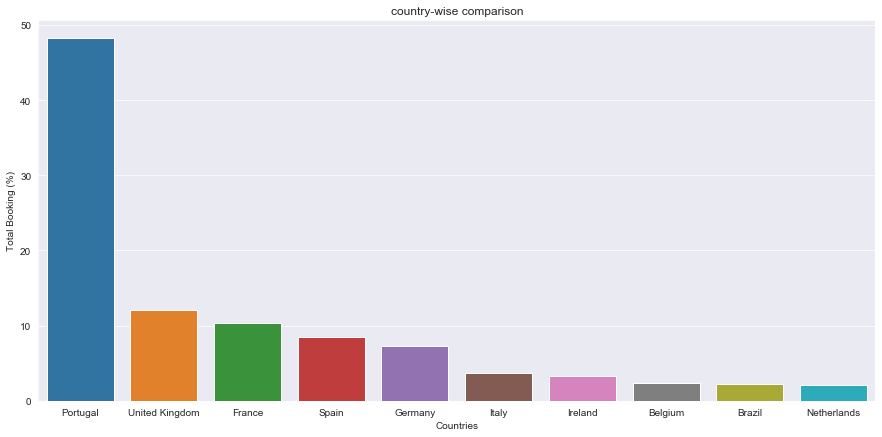

In [23]:
x,y = get_count(hotel['country'], limit=10)

# For each country code, we will select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))

From above,we observe that Portugal,UK,France,Spain and Germany are the top countries from which most guests come from. This means that more than 80% of guest come from these 5 countries.

## Q5. How long do guest stay in the hotel?

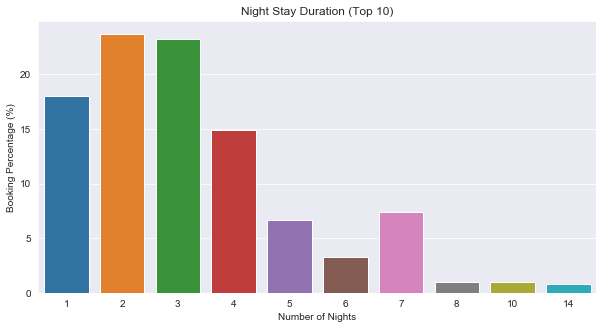

In [24]:
total_nights = hotel['stays_in_weekend_nights']+ hotel['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))

From the plot above, we will observe that most of the guest stay longer between two,three, one and four. This means that more than 60% of guest come under these options.

Let’s see the stay duration trend for each hotel type

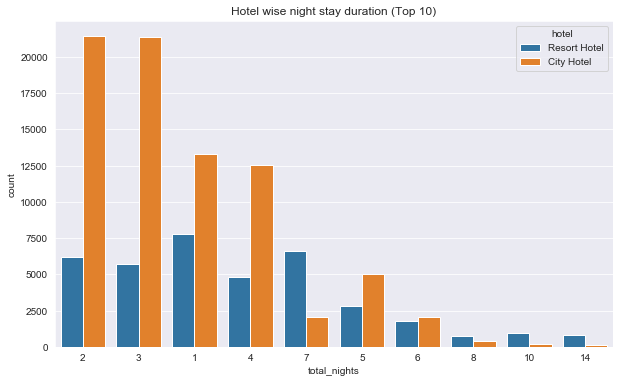

In [25]:
hotel.loc[:,'total_nights'] = hotel['stays_in_weekend_nights']+ hotel['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=hotel,
              order = hotel.total_nights.value_counts().iloc[:10].index, ax=ax);

For Resort hotel, the most popular stay duration is one, seven, two, three, and four days respectively.

For City hotel, most popular stay duration is two, three, one, four and five(weeks) respectively.

## Q6. What is the booking ratio between Resort hotel and City hotel?

We will now reuse the functions that we created earlier. All we have to do is to pass the dataframe column to get_count() function and pass its result (x and y array) to plot function.

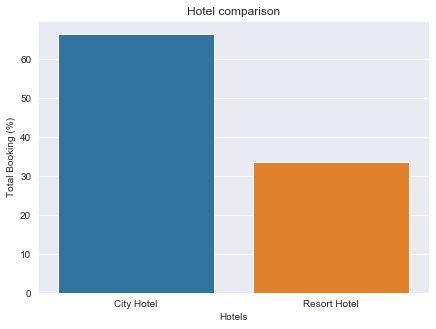

In [26]:
x,y = get_count(hotel['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

From the above plot illustration, more than 60% of the population booked City hotel.

## Q7. Which was the most booked accommodation type?(single, couple, family)

To do this, we will divide people staying in the hotel into 3 categories.

Single: 1 Adult only

Couple: 2 Adults. we can’t say for sure that these two people are an actual couple or not, data does not tell us anything about this, but we will assume they are couple.

Family or Friends: More than 2 people including adults, children, and babies. (or alternatively, we can call it a group).

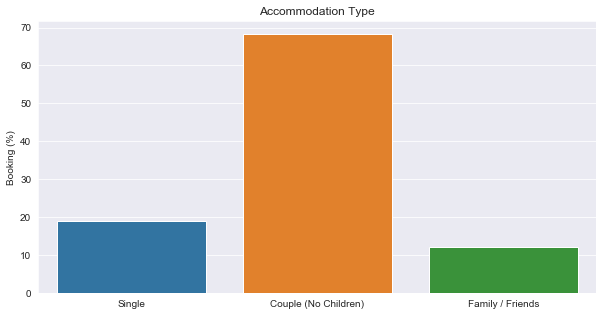

In [27]:
# Select single, couple, multiple adults and family
single   = hotel[(hotel.adults==1) & (hotel.children==0) & (hotel.babies==0)]
couple   = hotel[(hotel.adults==2) & (hotel.children==0) & (hotel.babies==0)]
#n_adults = hotel[(hotel.adults>2) & (hotel.children==0) & (hotel.babies==0)]
family   = hotel[hotel.adults + hotel.children + hotel.babies > 2]


# Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/hotel.shape[0]*100 for x in count]


# Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,5))

From the above plot, we observe that couple (or 2 adults) is the most popular accommodation type. So hotels can make plans accordingly.

##                             Preprocessing

(Missing Values, Feature Engineering / Feature Selection)

In [28]:
hotel_subset = hotel.copy()

In [29]:
print("# of NaN in each columns:", hotel.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

In [30]:
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

print('Missing value ratios:\nCompany: {}\nAgent: {}\nCountry: {}'.format(perc_mv(hotel, hotel['company']),
                                                                                   perc_mv(hotel, hotel['agent']),
                                                                                   perc_mv(hotel, hotel['country'])))

Missing value ratios:
Company: 94.30689337465449
Agent: 13.686238378423655
Country: 0.40874445095904177


In [31]:
hotel["agent"].value_counts().count()

333

As can be seen above, 94.3% of Company column are missing values. Therefore we do not have enough values to fill the rows of company column by predicting, filling by mean etc. It seems that the best option is dropping company column.

Furthermore, 13.68% of agent column are missing values, there is no need to drop agent column. But also we should not drop the rows because 13.68% of data is really huge amount and those rows have the chance to have crucial information. There are 333 unique agent, since there are too many agents they may not be predictable. Also NA values can be the agents that are not listed in present 333 agents. We can't predict agents and since missing values are 13% of all data we can't drop them too. I will decide what to do about agent after correlation section.

It will not be a problem if we drop the rows that have missing values in country column. Still, I will wait for correlation.

In [32]:
# company is dropped
hotel = hotel.drop(['company'], axis = 1)

In [33]:
# We have also 4 missing values in children column. If there is no information about children, In my opinion those customers do not have any children.
hotel['children'] = hotel['children'].fillna(0)

## Handling Features

We would check the features to create some more meaningful variables and reduce the number of features if it is possible.

In [34]:
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [35]:
# I will try to label them manually, and do the rest using get.dummies or label_encoder.
hotel['hotel'] = hotel['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

hotel['arrival_date_month'] = hotel['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [36]:
def family(hotel):
    if ((hotel['adults'] > 0) & (hotel['children'] > 0)):
        val = 1
    elif ((hotel['adults'] > 0) & (hotel['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

def deposit(hotel):
    if ((hotel['deposit_type'] == 'No Deposit') | (hotel['deposit_type'] == 'Refundable')):
        return 0
    else:
        return 1

In [37]:
def feature(hotel):
    hotel["is_family"] = hotel.apply(family, axis = 1)
    hotel["total_customer"] = hotel["adults"] + hotel["children"] + hotel["babies"]
    hotel["deposit_given"] = hotel.apply(deposit, axis=1)
    hotel["total_nights"] = hotel["stays_in_weekend_nights"]+ hotel["stays_in_week_nights"]
    return hotel

hotel = feature(hotel)

In [38]:
# Information of these columns is also inside of new features, so it is better to drop them.
# I did not drop stays_nights features, I can't decide which feature is more important there.
hotel = hotel.drop(columns = ['adults', 'babies', 'children', 'deposit_type', 'reservation_status_date'])

After the correlation, I will decide what to do about country, agent and total_nights.

## CORRELATION

In [39]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'total_nights', 'is_family', 'total_customer',
       'deposit_given'],
      dtype='object')

In [40]:
# Lets copy data to check the correlation between variables. 
cor_hotel = hotel.copy()

In [41]:
le = LabelEncoder()

In [42]:
# This data will not be used while predicting cancellation. This is just for checking correlation.
cor_hotel['meal'] = le.fit_transform(cor_hotel['meal'])
cor_hotel['distribution_channel'] = le.fit_transform(cor_hotel['distribution_channel'])
cor_hotel['reserved_room_type'] = le.fit_transform(cor_hotel['reserved_room_type'])
cor_hotel['assigned_room_type'] = le.fit_transform(cor_hotel['assigned_room_type'])
cor_hotel['agent'] = le.fit_transform(cor_hotel['agent'])
cor_hotel['customer_type'] = le.fit_transform(cor_hotel['customer_type'])
cor_hotel['reservation_status'] = le.fit_transform(cor_hotel['reservation_status'])
cor_hotel['market_segment'] = le.fit_transform(cor_hotel['market_segment'])

In [43]:
cor_hotel.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_nights,is_family,total_customer,deposit_given
hotel,1.000000,0.136531,0.075381,0.035267,0.001817,0.001270,-0.001862,-0.186596,-0.234020,0.008018,...,0.072432,0.047531,0.096719,-0.218873,-0.043390,-0.124331,-0.247479,-0.058306,-0.040821,0.172003
is_canceled,0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.001791,0.024765,-0.017678,...,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196,0.017779,-0.013010,0.046522,0.481457
lead_time,0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.085671,0.165799,0.000349,...,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175,0.157167,-0.043972,0.072265,0.380179
arrival_date_year,0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.065840,...,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683,0.031438,0.052711,0.052127,-0.065963
arrival_date_month,0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,-0.015205,...,0.019045,-0.029753,0.079315,0.000257,0.028026,-0.021090,0.021536,0.010427,0.027252,0.008746
arrival_date_week_number,0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,-0.017381,...,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387,0.018719,0.010611,0.025220,0.007773
arrival_date_day_of_month,-0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.007086,...,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460,-0.027408,0.014710,0.006742,-0.008616
stays_in_weekend_nights,-0.186596,-0.001791,0.085671,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,0.045744,...,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558,0.762790,0.052306,0.101426,-0.114275
stays_in_week_nights,-0.234020,0.024765,0.165799,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,0.036742,...,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607,0.941005,0.050424,0.101665,-0.079999
meal,0.008018,-0.017678,0.000349,0.065840,-0.015205,-0.017381,-0.007086,0.045744,0.036742,1.000000,...,-0.007132,0.044658,0.059098,-0.038923,0.023136,0.015393,0.045277,-0.041727,-0.005975,-0.090725


In [44]:
cor_hotel.corr()["is_canceled"].sort_values()

reservation_status               -0.917196
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
assigned_room_type               -0.176028
booking_changes                  -0.144381
agent                            -0.127883
is_repeated_guest                -0.084793
customer_type                    -0.068140
reserved_room_type               -0.061282
previous_bookings_not_canceled   -0.057358
meal                             -0.017678
is_family                        -0.013010
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
arrival_date_week_number          0.008148
arrival_date_month                0.011022
arrival_date_year                 0.016660
total_nights                      0.017779
stays_in_week_nights              0.024765
total_customer                    0.046522
adr                               0.047557
days_in_waiting_list              0.054186
market_segment                    0.059338
previous_ca

As can be seen in the sorted list above, reservation_status seems to be the most impactful feature. With that information, accuracy rate should be really high. It would be better to drop reservation_status column to see how other features can predict. I am going to try both.

Impacts of three feature that are created:

deposit_given = 0,481457

is_family = -0,013010

total_customer = 0,046522

Apart from this, I will not use arrival_date_week_number, stays_in_weekend_nights and arrival_date_day_of_month since their importance are really low while predicting cancellations.

In addition, we still have some missing values in agent column. It has nice importance on predicting cancellation but since the missing values are equal to 13% of the total data it is better to drop that column. It has a lot of class inside of it otherwise we could try predicting missing values but they may misguide the predictions.

In [45]:
# It is highly correlated to total_nights and also there is no much difference impact, so I will not use total_nights.
#Week nights have higher impact.
"""
I tried some models by using different features as (only total_nights | weekend_nights and week_nights | only week_nights ...) 
and the models using only week nights seems to have a bit higher accuracy score. 
"""

cor_hotel.corr()['stays_in_week_nights']

hotel                            -0.234020
is_canceled                       0.024765
lead_time                         0.165799
arrival_date_year                 0.030883
arrival_date_month                0.019212
arrival_date_week_number          0.015558
arrival_date_day_of_month        -0.028174
stays_in_weekend_nights           0.498969
stays_in_week_nights              1.000000
meal                              0.036742
market_segment                    0.108569
distribution_channel              0.087185
is_repeated_guest                -0.097245
previous_cancellations           -0.013992
previous_bookings_not_canceled   -0.048743
reserved_room_type                0.168616
assigned_room_type                0.100795
booking_changes                   0.096209
agent                            -0.110354
days_in_waiting_list             -0.002020
customer_type                    -0.127223
adr                               0.065237
required_car_parking_spaces      -0.024859
total_of_sp

In [46]:
cor_hotel = cor_hotel.drop(columns = ['total_nights', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

In [47]:
# Lets delete the NA rows of country column
indices = cor_hotel.loc[pd.isna(cor_hotel["country"]), :].index 
cor_hotel = cor_hotel.drop(cor_hotel.index[indices])   
cor_hotel.isnull().sum()

# There is no missing value in the data

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_day_of_month         0
stays_in_week_nights              0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
is_family                         0
total_customer                    0
deposit_given                     0
dtype: int64

Since we have decided what to do with features and missing values, we can now work on our data.

In [48]:
indices = hotel.loc[pd.isna(hotel["country"]), :].index 
hotel = hotel.drop(hotel.index[indices])   
hotel = hotel.drop(columns = ['arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

In [49]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'total_nights', 'is_family', 'total_customer',
       'deposit_given'],
      dtype='object')

In [50]:
# I will copy data in case of any changes on features, missing values, etc.
hot = hotel.copy()

In [51]:
# Let's use one-hot-encoding
hot = pd.get_dummies(data = hot, columns = ['meal', 'market_segment', 'distribution_channel',
                                            'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status'])

In [52]:
hot['country'] = le.fit_transform(hot['country']) 
# There are more than 300 classes, so I wanted to use label encoder on this feature.

## Decision Tree Model (reservation_status included)

Decision trees come under the supervised learning algorithms category. It is primarily used for regression and classification in machine learning models. It provides transparency by offering a single view of all traces and alternatives. Decision tree also assign specific values to problems and decisions, enabling better decision-making.

In [53]:
y = hot["is_canceled"]
x = hot.drop(["is_canceled"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [54]:
cart = DecisionTreeClassifier(max_depth = 12)

In [55]:
cart_model = cart.fit(x_train, y_train)

In [56]:
y_pred = cart_model.predict(x_test)

In [57]:
print('Decision Tree Model')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

Decision Tree Model
Accuracy Score: 1.0

Confusion Matrix:
 [[22353     0]
 [    0 13318]]

AUC Score: 1.0


Text(0.5, 0, 'Feature Importances (%)')

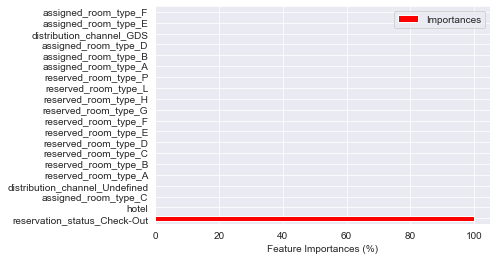

In [58]:
pd.DataFrame(data = cart_model.feature_importances_*100,
                   columns = ["Importances"],
                   index = x_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

In the correlation part above, we have seen the impact of reservation_status. Reservation_status dominates other features totally. By keeping reservation_status in the data, it is possible to achieve 100% accuracy rate because that feature is direct way to predict cancellations, its like cheating. For the sake of analysis, I will drop reservation_status and continue the analysis without it.

## Final Arrangements Before Comparing the Models

In [59]:
fin = hot.drop(columns = ['reservation_status_Canceled', 'reservation_status_Check-Out', 'reservation_status_No-Show'], axis = 1)

In [60]:
y = fin["is_canceled"]
x = fin.drop(["is_canceled"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [61]:
# We can use the functions to apply the models and roc curves to save space.
def model(algorithm, x_train, x_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(x_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(x_test)[:,1]
    y_pred = alg_model.predict(x_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    

def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')


## Model and ROC Curve Comparison

RECEIVER OPERATING CHARACTERISTICS(ROC Curve)

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

LOGISTIC REGRESSION

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable.
Because of its efficient and straightforward nature, it doesn't require high computation power, easy to implement, easily interpretable, used widely by data analysts and scientists. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations

In [62]:
print('Model: Logistic Regression\n')
model(LogisticRegression(solver = "liblinear"), x_train, x_test, y_train, y_test)

Model: Logistic Regression

Accuracy Score: 0.8047994168932746

Confusion Matrix:
 [[20480  1873]
 [ 5090  8228]]


In [63]:
LogR = LogisticRegression(solver = "liblinear")
cv_scores = cross_val_score(LogR, x, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.7703740330889889


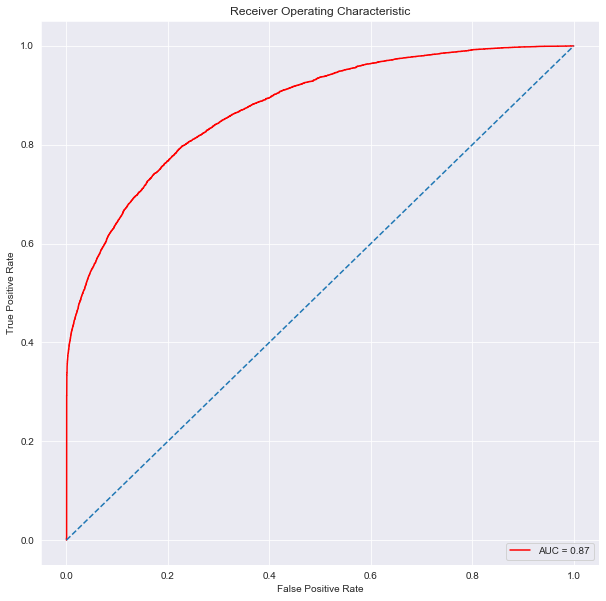

In [64]:
ROC(y_test, y_prob)

## Gaussian Naive Bayes Model

Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. Gaussian Naive Bayes supports continuous valued features and models each as conforming to a Gaussian (normal) distribution.


In [65]:
print('Model: Gaussian Naive Bayes\n')
model(GaussianNB(), x_train, x_test, y_train, y_test)

Model: Gaussian Naive Bayes

Accuracy Score: 0.586246530795324

Confusion Matrix:
 [[ 9604 12749]
 [ 2010 11308]]


In [66]:
NB = GaussianNB()
cv_scores = cross_val_score(NB, x, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.5624280984012298


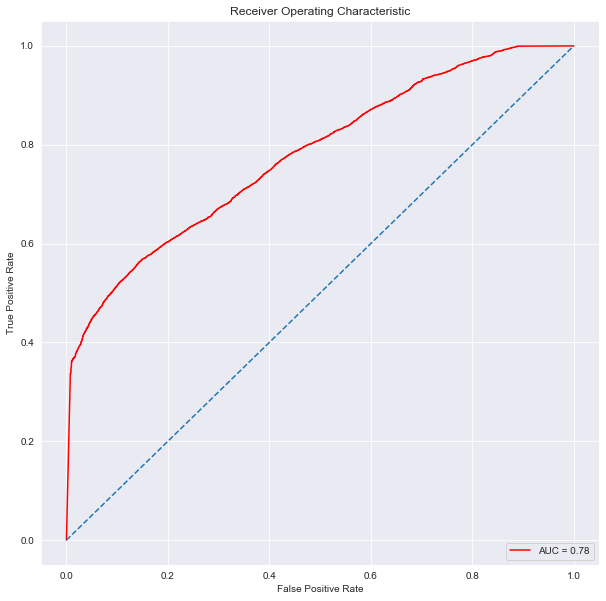

In [67]:
ROC(y_test, y_prob)

## Decision Tree Model (reservation_status excluded)

In [68]:
print('Model: Decision Tree\n')
model(DecisionTreeClassifier(max_depth = 12), x_train, x_test, y_train, y_test)

Model: Decision Tree

Accuracy Score: 0.846317737097362

Confusion Matrix:
 [[20375  1978]
 [ 3504  9814]]


In [69]:
DTC = DecisionTreeClassifier(max_depth = 12)
cv_scores = cross_val_score(DTC, x, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.674041871259228


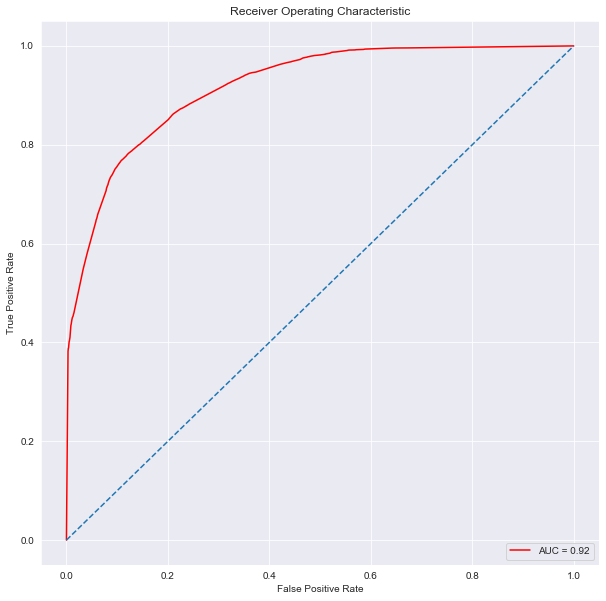

In [70]:
ROC(y_test, y_prob)

## Random Forest Classifier

Random forest is a supervised learning algorithm which is used for both classification as well as regression. But however, it is mainly used for classification problems. Random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.


In [71]:
print('Model: Random Forest\n')
model(RandomForestClassifier(), x_train, x_test, y_train, y_test)

Model: Random Forest

Accuracy Score: 0.8849485576518741

Confusion Matrix:
 [[20966  1387]
 [ 2717 10601]]


In [72]:
RFC = RandomForestClassifier()
cv_scores = cross_val_score(RFC, x, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.6719982006882526


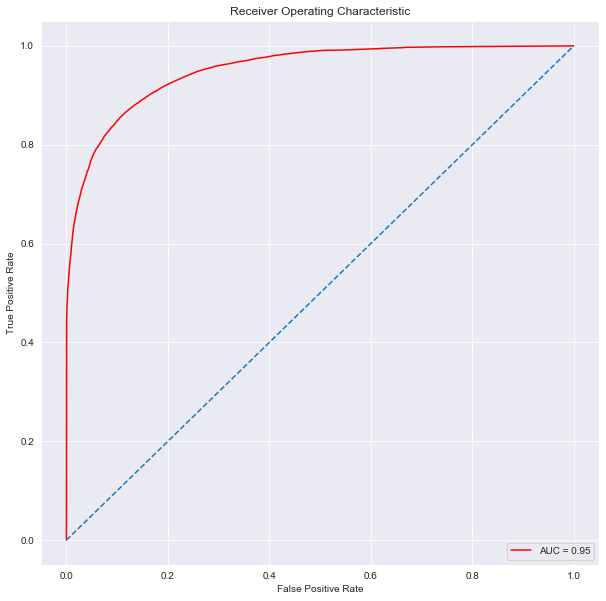

In [73]:
ROC(y_test, y_prob)

## Random Forest Model Tuning

In [74]:
rf_parameters = {"max_depth": [10,13],
                 "n_estimators": [10,100,500],
                 "min_samples_split": [2,5]}

In [75]:
rf_model = RandomForestClassifier()

In [76]:
rf_cv_model = GridSearchCV(rf_model,
                           rf_parameters,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

rf_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 24.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [77]:
print('Best parameters: ' + str(rf_cv_model.best_params_))

Best parameters: {'max_depth': 13, 'min_samples_split': 2, 'n_estimators': 500}


In [78]:
rf_tuned = RandomForestClassifier(max_depth = 13,
                                  min_samples_split = 2,
                                  n_estimators = 500)

print('Model: Random Forest Tuned\n')
model(rf_tuned, x_train, x_test, y_train, y_test)

Model: Random Forest Tuned

Accuracy Score: 0.8520086344649715

Confusion Matrix:
 [[21104  1249]
 [ 4030  9288]]


Tuned model has worse accuracy score than default one. In the default model there is no limit for max depth. Increasing max depth gives us better accuracy scores but may decrease generalization.

##                                                          Conclusion

## Feature Importances

Text(0.5, 0, 'Feature Importances (%)')

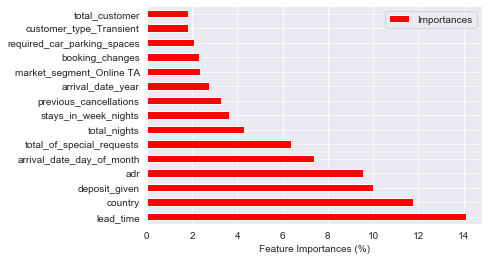

In [79]:
randomf = RandomForestClassifier()
rf_model1 = randomf.fit(x_train, y_train)

pd.DataFrame(data = rf_model1.feature_importances_*100,
                   columns = ["Importances"],
                   index = x_train.columns).sort_values("Importances", ascending = False)[:15].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

## Summary Table of the Models

In [80]:
table = pd.DataFrame({"Model": ["Decision Tree (reservation_status included)", "Logistic Regression",
                                "Gaussian Naive Bayes", "Decision Tree (reservation_status excluded)", "Random Forest",
                                "Random Forest Tuned"],
                     "Accuracy Scores": ["1", "0.805", "0.586", "0.846", "0.886",
                                         "0.853"],
                     "ROC | Auc": ["1", "0.87", "0.78",
                                   "0.92", "0.95", "0"]})


table["Model"] = table["Model"].astype("category")
table["Accuracy Scores"] = table["Accuracy Scores"].astype("float32")
table["ROC | Auc"] = table["ROC | Auc"].astype("float32")

pd.pivot_table(table, index = ["Model"]).sort_values(by = 'Accuracy Scores', ascending=False)

,Accuracy Scores,ROC | Auc
Model,,
Decision Tree (reservation_status included),1.000,1.00
Random Forest,0.886,0.95
Random Forest Tuned,0.853,0.00
Decision Tree (reservation_status excluded),0.846,0.92
Logistic Regression,0.805,0.87
Gaussian Naive Bayes,0.586,0.78


From the summary table presented above, we can observe that the best algorithm is Random Forest for this dataset analysis.

0 values are uncalculated ones.

We did not count the decision tree with Reservation_Status because all the algorithms would give 100% accuracy scores when 
Reservation_Status is included.


Furthermore, we learned that:

Bookings got canceled 37% of the time. While booking guest checked-in (did not cancel the booking ) almost 63% of the time.

More than double bookings were made in 2016, compared to the previous year of 2015. But the bookings decreased by almost 15% the next year 2017..

Most bookings were made from July to August. While the least bookings were made at the start and end of the year.

Portugal,UK,France,Spain and Germany are the top countries from which most guests come from. This means that more than 80% of guest come from these 5 countries..

Most people stay Two,Three,One and four. Therefore,more than 60% of guests come under these options.

-> For Resort hotels, the most popular stay duration is one, two, three, and four days respectively.

-> For City hotels, the most popular stay duration is one, two, three, and seven(weeks) respectively.

More than 60% of the population booked a City hotel.

We observe that couples (or 2 adults) is the most popular accommodation type. So hotels can make plans accordingly.